In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the data
df=pd.read_csv("/home/osboxes/Desktop/housingShort_data.csv")
df

,sqft_living,price
0,1234,1.300000e+07
1,1340,3.130000e+05
2,3650,2.384000e+06
3,1930,3.420000e+05
4,2000,4.200000e+05
...,...,...
4596,1510,3.081667e+05
4597,1460,5.343333e+05
4598,3010,4.169042e+05
4599,2090,2.034000e+05


In [3]:
#extract the variables
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [4]:
x

array([[1234],
       [1340],
       [3650],
       ...,
       [3010],
       [2090],
       [1490]])

In [5]:
y

array([13000000.    ,   313000.    ,  2384000.    , ...,   416904.1667,
         203400.    ,   220600.    ])

In [6]:
print("NaN value avialbel in the dataset is :",df.isnull().values.any())
print("sum of num values are: ",df.isnull().sum())

NaN value avialbel in the dataset is : False
sum of num values are:  sqft_living    0
price          0
dtype: int64


In [7]:
#handing the missing data 
#there is no missing data


In [8]:
#handle categorical data
#there is no categoriacl data


In [9]:
#feature scaling data
from sklearn.preprocessing import StandardScaler
en_sc=StandardScaler()
x=en_sc.fit_transform(x)
x

array([[-0.93983965],
       [-0.82977725],
       [ 1.56875244],
       ...,
       [ 0.90422473],
       [-0.05103384],
       [-0.67402857]])

In [13]:
#spliting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [14]:
x_train

array([[-1.38008926],
       [-1.07897514],
       [ 0.62387711],
       ...,
       [ 0.55638601],
       [-0.10295007],
       [ 4.06073134]])

In [15]:
x_test

array([[-0.50789664],
       [ 0.69655983],
       [-0.14448305],
       ...,
       [-0.31061498],
       [-0.14967467],
       [-0.48713015]])

In [16]:
y_train

array([ 206000.,  250000., 1105000., ...,  660000.,  335000., 1600000.])

In [17]:
y_test

array([219950., 825000., 415000., ..., 265000., 266000., 533000.])

In [18]:
print(f'x_train dataset:{ x_train.shape }',"\n")
print(f'x_test dataset:{ x_test.shape }',"\n")
print(f'y_train dataset:{ y_train.shape }',"\n")
print(f'y_test dataset:{ y_test.shape }',"\n")


x_train dataset:(3450, 1) 

x_test dataset:(1151, 1) 

y_train dataset:(3450,) 

y_test dataset:(1151,) 



In [19]:
#train the machine learning model 
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(max_iter=1000,tol=1e-3)
sgd.fit(x_train,y_train)

SGDRegressor()

In [20]:
#predict the data with test sample
y_pred=sgd.predict(x_test)

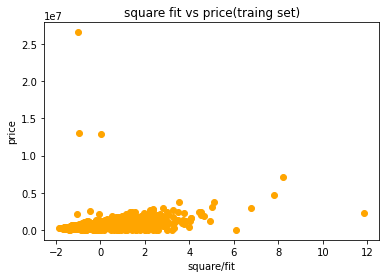

In [22]:
#model visualiztion

#training set point
plt.scatter(x_train,y_train,color='orange')
plt.title("square fit vs price(traing set)")
plt.xlabel("square/fit")
plt.ylabel("price")
plt.show()

In [28]:
#model visualiztion
import sklearn.metrics as metrics

#print the model visualiztion result
print("linear regression")
print("Attribute : intr_",sgd.intercept_)
print("attribute : coef_",sgd.coef_)
print("mean Absolute error: ",metrics.mean_absolute_error(y_test,y_pred))
print("mean Squared error: ",metrics.mean_squared_error(y_test,y_pred))
print("root MSE:",np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print("R-square: ",metrics.r2_score(y_test,y_pred))
r_square=metrics.r2_score(y_test,y_pred)
print("Ajusted R-squared:",(1-(1-r_square)*(len(df)-1)/(len(df)-(df.shape[1]-1)-1)))

linear regression
Attribute : intr_ [563009.58700846]
attribute : coef_ [237117.03747521]
mean Absolute error:  177395.8912180266
mean Squared error:  72167915289.95155
root MSE: 421.1839161435615
R-square:  0.48558258005135524
Ajusted R-squared: 0.4854707258613251


In [45]:

#source code for under fitting
from sklearn.preprocessing import PolynomialFeature
poly=PolynomialFeature(degree=1)
x_poly=poly.fit_transform(x_train)
poly.fit(x_train,y_train)

linreg=LinearRegression()
linreg.fit(x_poly,y_train)

plt.scatter(x_train,y_train,color='green')
plt.plot(x_train,y_pred,color='purple')
plt.scatter(x_test,y_test,color='red')


ImportError: cannot import name 'PolynomialFeature' from 'sklearn.preprocessing' (/home/osboxes/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/__init__.py)